## Laboratorium 3. - Techniki generacji sygnałów o charakterze losowym
Tematem laboratorium była generacja wielowymiarowych sekwencji sygnałów pseudo losowych o określonych własnościach probabilistycznych. Tak jak poprzednio temat nie był realizowany na podstawie instrukcji.

In [1]:
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt
import math
import time
from scipy import signal
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy


Pierwszym podpunktem zajęć była generacja sygnału piłokształtnego, w celu późniejszego stworzenia generatora liczb pseudolosowych.

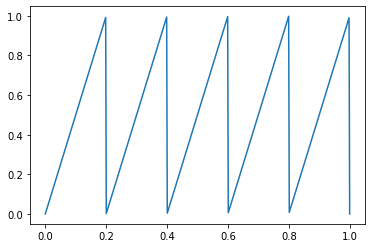

In [2]:
t = np.linspace(0, 1, 500)
plt.plot(t, ((signal.sawtooth(2 * np.pi * 5 * t))+1)/2)

In [3]:
((signal.sawtooth(2 * np.pi * 5 * 0.1))+1)/2

0.5

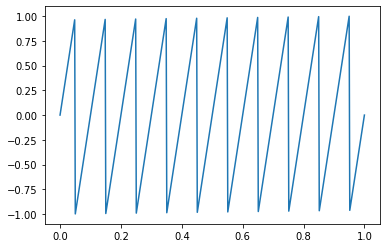

In [4]:
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 10 * t-np.pi))
plt.show()

Kolejnym punktem było stworzenie funkcji generującej zadaną ilość licz losowych. Do funkcji generatora dodano dodatkowo parametr określający ilość zębów. Po napisaniu funkcji przeanalizowano histogram uzyskanych liczb.

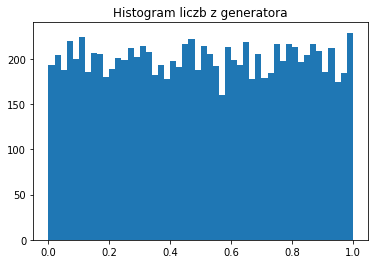

In [5]:
def own_uniform(number, seed, tringle_number=5):
    results = np.zeros(number)
    for i in range(number):
        seed = ((signal.sawtooth(2 * np.pi * tringle_number * seed))+1)/2
        #print(((signal.sawtooth(2 * np.pi * 5 * 0.1))+1)/2)
        results[i] = seed
    return results

plt.hist(own_uniform(10000, 0.152323, 10), bins=50)
plt.title('Histogram liczb z generatora')
plt.show()

W przypadku zbyt małej liczby zębów generator po osiągnięciu pewnej wartości przestaje generować wartości losowe osiągając zbieżność. Poniżej zaprezentowano histogram dla dwóch zębów na przedziale od zera do jeden.

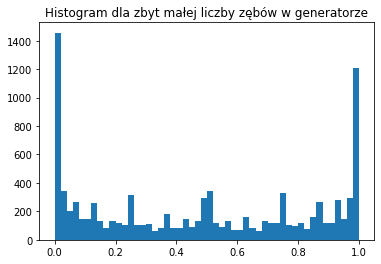

In [6]:
plt.hist(own_uniform(10000, 0.152323, 2), bins=50)
plt.title('Histogram dla zbyt małej liczby zębów w generatorze')
plt.show()

Następnie zgodnie z transformacją Boxa-Mullera na podstawie dwóch niezależnych liczb o rozkładzie jednostajnym z przedziału zero jeden, wygenerowano dwie niezlależne liczby z rozkładu normalnego N(0,1) za pomocą wzorów:

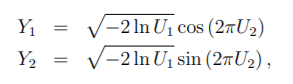

Czynność tą powtórzono 10000 i stworzono histogramy:

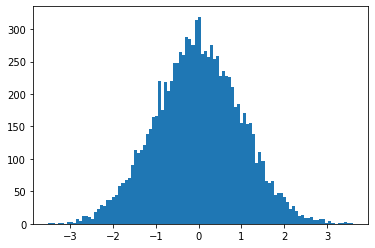

In [7]:
plt.hist(np.sqrt(-2*np.log(own_uniform(10000, 0.152323, 10)))*np.cos(2*np.pi*own_uniform(10000, 0.3434, 10)), bins=100)
plt.show()

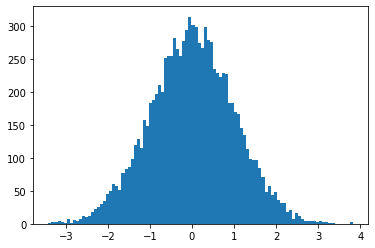

In [8]:
plt.hist(np.sqrt(-2*np.log(own_uniform(10000, 0.152323, 10)))*np.sin(2*np.pi*own_uniform(10000, 0.3434, 10)), bins=100)
plt.show()

Następnie sprawdzono czy dwie generowane liczby są od siebie niezależne. W tym celu policzono macierz korelacji:

In [9]:
N = 1000
s1 = np.sqrt(-2*np.log(own_uniform(N, 0.152323, 10)))*np.cos(2*np.pi*own_uniform(N, 0.3434, 10))
s2 = np.sqrt(-2*np.log(own_uniform(N, 0.152323, 10)))*np.sin(2*np.pi*own_uniform(N, 0.3434, 10))

In [10]:
s = np.array([s1, s2])
np.cov(s)

array([[0.97853308, 0.01653135],
       [0.01653135, 0.99839178]])

Zaprezentowana powyżej macierz ma po przekątnych wartości bliskie 1, co jest zgodne z oczekiwaniami (odchylenie standardowe równe 1). Ponadto pozostałe wartości są bliskie 0, co określa brak zależności pomiędzy liczbami uzyskanymi transformacją Boxa-Mullera. Poniżej wykres punktowy potwierdzający brak zależności między parami liczb.

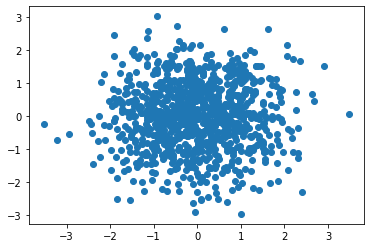

In [11]:
plt.scatter(s[0], s[1])

Kolejnym punktem było, aby za pomocą rozkładu Cholesky'ego wyindukować zadaną zależności liniową między wcześniej wygenerowanymi niezależnymi zmiennymi z rozkładu normalnego. W tym celu należy wyznaczyć wartość A z podanej poniżej wartości sigma.

In [12]:
sigma = np.array([[1, 0.3],[0.3, 1]])
sigma

array([[1. , 0.3],
       [0.3, 1. ]])

Macierz A uzyskano za pomocą funkcji $cholesky$ z pakiety $scipy.linalg$. Następnie przemnożono wartość A przez A transponowane w celu sprawdzenia poprawności wyników. Uzyskana macierz okazała się zbliżona do wyjściowej macierzy sigma.
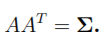

In [13]:
A = scipy.linalg.cholesky(sigma)
A @ A.T

array([[1.09      , 0.28618176],
       [0.28618176, 0.91      ]])

Ostatnim krokiem było przemnożeniem macierzy $A$ razy niezależne sygnały $s$. Na uzyskanej charakterystyce punktowej (w odróżnieniu do zaprezentowanej na wcześniejszym wykresie) widać zależność pomiędzy zmiennymi, która została określona w macierzy sigma.

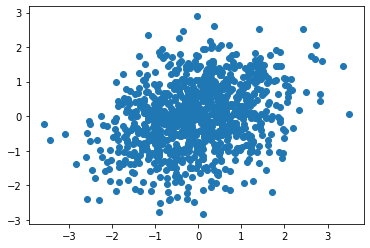

In [14]:
result = A @ s
plt.scatter(result[0], result[1])

### Podsumowanie
W trakcie laboratorium stworzono generator liczb pseudo losowych, działający w oparciu o funkcję piłokształtną. Przy tworzeniu generatora należy pamiętać, że przy zbyt małej liczbie zębów działanie generatora może być niepoprawne. Następnie transformatą Boxa-Mullera na podstawie dwóch niezależnych liczb o rozkładzie jednostajnym wygenerowano dwie niezależne liczby z rozkładu normalnego. Ostatnim punktem było wyindukowane zdanej zależności pomiędzy niezależnymi zmiennymi z rozkładu normalnego za pomocą rozkładu Cholesky'ego.